## 4 zajęcia: Dopasowanie rozkładu do danych

   Pierwszym krokiem jest ponowne pobranie danych z internetu. Cały czas pracujemy na rzekach.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

URL = 'https://en.wikipedia.org/wiki/List_of_rivers_of_Belarus'
resp = requests.get(URL)
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content,'html.parser')
    tab = soup.find('table',{'class':"wikitable"})
    df = pd.read_html(str(tab))[0]
    
names = df['Name']
df

,Name,"Total, km","In Belarus, km"
0,Dnieper River,2145,690
1,Western Dvina,1020,328
2,Neman River,937,459
3,Bug River,831,169
4,Pripyat River,761,495
5,Sozh River,648,493
6,Berezina River,613,613
7,Vilija,510,276
8,Ptsich,421,421
9,Shchara,325,325


## Objaśnienie statysytczne

   Zanim przejdziemy do testów na rozkład normalny wyjaśnijmy co tak naprawdę testujemy i liczymy. W tym zadaniu zajumjemy się dwoma testami normalności danych Shapiro-Wilka oraz D’Agostino-Pearsona. W obu mamy identyczne hipotezy.
   
$$
{
    H_{0}: Próba\ pochodzi\ z\ populacji\ o\ rozkładzie\ normalnym. \\
    H_{1}: Próba\ nie\ pochodzi\ z\ populacji\ o\ rozkładzie\ normalnym.
}
$$

   Dokumentacja języka Python mówi tylko tyle, że jeśli wynikowa p-wartość będzie mniejsza od 0,05 to odrzucamy hipotezę zerową i przyjmujemy alternatywną. Dlaczego mamy pewność że sprawdzając tylko jedną wartość jesteśmy pewni wyniku? Przejdźmy zatem do danych rzek i wybierzmy sobie dwie cechy, które mamy: "Długość w kraju" oraz "Długość całkowitą". Oznaczmy odpowiednio przez X1, X2.

In [33]:
X1 = df['In Belarus, km'].values
X2 = df['Total, km'].values

print('Długość w kraju:   ', X1)
print('Długość całkowita: ', X2)


Długość w kraju:    [690 328 459 169 495 493 613 276 421 325 297]
Długość całkowita:  [2145 1020  937  831  761  648  613  510  421  325  297]


   Zaimportujmy potrzebne metody do testów, czyli .shapiro oraz .normaltest z modułu scipy.stats.

In [34]:
from scipy import stats

## Test Shapiro

In [35]:
print('Wyniki testu Shapiro dla: ')
print('Długość w kraju:    %s - statystyka, %s - p-wartość' % (round(stats.shapiro(X1)[0],3), round(stats.shapiro(X1)[1], 3)))
print('Długość całkowita:  %s - statystyka, %s - p-wartość' % (round(stats.shapiro(X2)[0],3), round(stats.shapiro(X2)[1], 3)))

Wyniki testu Shapiro dla: 
Długość w kraju:    0.971 - statystyka, 0.897 - p-wartość
Długość całkowita:  0.785 - statystyka, 0.006 - p-wartość


 Jak widzimy wynikiem są dwie wartości. Pierwsza z nich to wartość statystyki wyliczana z następującego wzoru:
   
<img src="https://latex.codecogs.com/svg.image?W&space;=&space;\frac{[\sum_{i}^{}a_{i}(n)(X_{n-i&plus;1}&space;-&space;X_i)&space;]^2}{\sum_{j=1}^n(X_j&space;-&space;\overline{X})^2}&space;" title="https://latex.codecogs.com/svg.image?W = \frac{[\sum_{i}^{}a_{i}(n)(X_{n-i+1} - X_i) ]^2}{\sum_{j=1}^n(X_j - \overline{X})^2} " />

gdzie:

$$
{
W - wynik\ testu\\
a(n) - stała\ odczytywana\ z\ \href{https://www.naukowiec.org/tablice/statystyka/wartosci--a_338.html}{tablicy}\\
X_{n-i+1} - X_i - różnica\ pomiędzy\ skrajnymi\ obserwacjami\\
j - kolejne\ obserwacje\ w\ próbie\\
i - kolejne\ różnice\ między\ skrajnymi\ obserwacjami\\
}
$$

   Po wyliczeniu statystki możemy spojrzeć do $$\href{https://www.naukowiec.org/tablice/statystyka/rozklad-w-test-shapiro-wilka-_335.html}{tabeli\ rozkładu\ dla\ testu\ Shapiro-Wilka}$$ i poszukać czy nasza wyliczona wartość jest większa czy mniejsza od tej z tablicy.

Python robi to wszystko za nas i podaje nam wynik na tacy jako p-wartość. Jeśli jest ona większa od 0,05 to nie mamy podstaw do odrzucenia hipotezy zerowej. Tak jest w przypadku cechy "Długość w kraju". Natomiast hipotezę zerową odrzucamy dla cechy "Długość całkowita".
   Innymi słowy dane dla długości w kraju mają rozkład normalny, a dla długości całkowitej nie.

## Test D’Agostino-Pearsona

    Nie powinno stosować się tego testu dla zbiorów danych mniejszych niż 20.
W tym przypadku nie ma to znaczenia ponieważ wyniki wyglądają bardzo podobnie jak wyżej, cały schemat tego testu jest analogiczny, stosowane są jedynie inne wzory. Możemy wyciągnąć dla tego testu identyczne wnioski.
    "Długość w kraju" ma rozkład normalny
    "Długość całkowita" nie ma rozkładu normalnego.

In [37]:
print('Wyniki testu D’Agostino-Pearsona dla: ')
print('Długość w kraju:    %s - statystyka, %s - p-wartość' % (round(stats.normaltest(X1)[0],3), round(stats.normaltest(X1)[1], 3)))
print('Długość całkowita:  %s - statystyka, %s - p-wartość' % (round(stats.normaltest(X2)[0],3), round(stats.normaltest(X2)[1], 4)))

Wyniki testu D’Agostino-Pearsona dla: 
Długość w kraju:    0.244 - statystyka, 0.885 - p-wartość
Długość całkowita:  15.942 - statystyka, 0.0003 - p-wartość


## a) Estymacja parametrów rozkładu normalnego

Możemy to zrobić dla cechy "Długość w kraju", ponieważ te dane posiadają rozkład normalny. Wzory na znalezienie parametrów uzyskujemy metodą największej wiarogodności. Żeby ładnie zaprezentować te dane na wykresie trzeba będzie je jakoś ustandaryzować tzn. podzielić przez jakąś liczbę żeby było widać efekty na wykresie rozkładu normalnego. Dlaczego? Ponieważ jak dobrze wiemy pole pod wykresem funkcji rozkładu normalnego nie może mieć więcej niż 1. Najkrótsze rzeki mają dla tego pliku długość około 300 km, więc nie było by widać czy dane mają rozkład normalny bez standaryzacji.

$$\widehat{\mu} = \frac{1}{N}\sum_{i=1}^Nx_i,$$
$$\widehat{\sigma}^2 = \frac{1}{N}\sum_{i=1}^N(x_i-\mu)^2,$$

Średnia arytmetyczna:   415.09
Wariancja:              23871
Odchylenie standardowe: 154.5


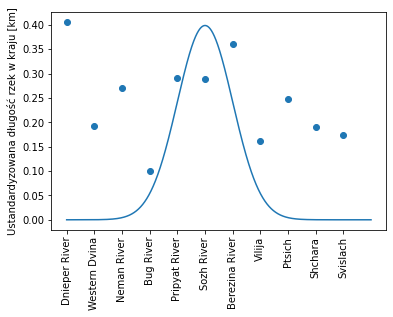

In [38]:
import statistics
import math
from scipy.stats import norm

print('Średnia arytmetyczna:   %s' % round(X1.mean(),2))
print('Wariancja:              %s' % statistics.variance(X1))
print('Odchylenie standardowe: %s' % round(math.sqrt(statistics.variance(X1)),2))

STANDARD = 1700

result = plt.scatter(names, X1/STANDARD)
plt.xticks(rotation=90)
plt.ylabel('Ustandardyzowana długość rzek w kraju [km]')


z = np.arange(0, 11, 0.001)

plt.plot(z, norm.pdf(z, 5, 1))

plt.show()

## b) Wizualizacja danych i ich modelu w postaci estymatora Parzena dla 3 wybranych szerokości okna h.

Druga cecha czyli "Długość całkowita" nie ma rozkładu normalnego, dlatego posłużymy się estymatorem Parzena dla trzech różnych wartości okna h. Niestety, ponieważ kilka rzek ma długości całkowite zbliżone do siebie nie będą one zbyt widoczne na wykresie. Dlatego najlepszym sposobem na przedstawinie ich będzie jak wyżej ustandaryzowanie wartości.

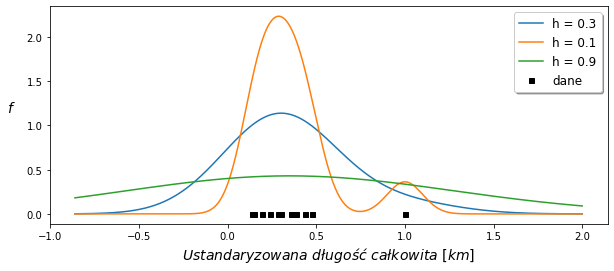

In [39]:
maximum_length = max(X2)
X2 = X2/maximum_length

def K(x):
  return np.exp(-x**2/2)/np.sqrt(2*np.pi)

os_x = np.linspace(X2.min()-1, X2.max()+1, num=1000)

H = [0.3, 0.1, 0.9]
N = X2.size

plt.figure(figsize=(10,4))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(X2):
    suma += K((os_x-pomiar)/h)
    # plt.annotate(r'$x_{}$'.format(nr+1), xy=[X2[nr],0.05], horizontalalignment='center', fontsize=12)
  os_y = suma/(h*N)
  plt.plot(os_x, os_y, label=f'h = {h}')
  

plt.plot(X2, np.zeros_like(X2) , 's', markersize=5, color='black', label='dane')
plt.xlabel('$Ustandaryzowana \\ długość \\ całkowita \\ [km] $', fontsize=14)
plt.ylabel('$f$', fontsize=14, rotation='horizontal', labelpad=15)
plt.legend(fontsize=12, shadow=True)
plt.show()